Baseline MAE (Returns): 0.02033
Interpretation: On average, the model is off by 2.03% per day.


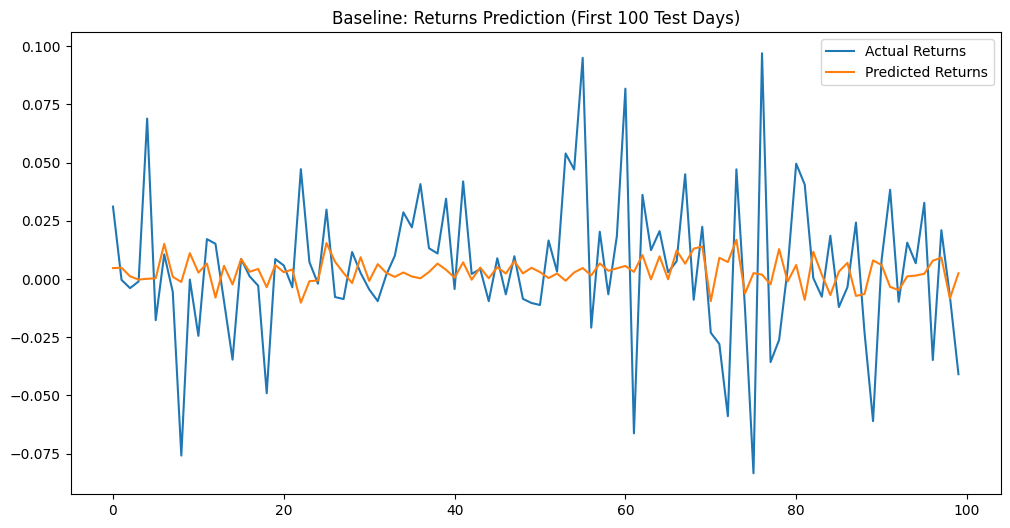

In [2]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 1. Load Data
X = np.load('../data/processed/X.npy')
y = np.load('../data/processed/y.npy')
scaler = joblib.load('../data/processed/scaler.pkl')
test_prices = np.load('../data/processed/test_prices.npy')

# 2. Split Data (80/20)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 3. Flatten for Linear Regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 4. Train Baseline
model = LinearRegression()
model.fit(X_train_flat, y_train)
y_pred = model.predict(X_test_flat)

# 5. Inverse Scale to get "Real Percentage" (e.g., 0.05 for 5%)
# The dummy trick is needed again because scaler expects 2 columns
def inverse_transform(predictions, scaler):
    dummy = np.zeros((len(predictions), 2))
    dummy[:, 0] = predictions
    return scaler.inverse_transform(dummy)[:, 0]

real_pred_returns = inverse_transform(y_pred, scaler)
real_actual_returns = inverse_transform(y_test, scaler)

# 6. Evaluate (MAE in Terms of Percentage)
mae = mean_absolute_error(real_actual_returns, real_pred_returns)
print(f"Baseline MAE (Returns): {mae:.5f}")
print(f"Interpretation: On average, the model is off by {mae*100:.2f}% per day.")

# 7. Reconstruction: Turn % back into $
# Formula: Price_Today = Price_Yesterday * (1 + Predicted_Return)
# The ACTUAL previous prices are used to see how the model *would* have performed
# This is called "One-Step Ahead Forecast"

reconstructed_prices = []
# Align lengths. test_prices matches y_test length.
for i in range(len(real_pred_returns)):
    # Price = Previous_Close * (1 + Predicted_Return)
    # Note: test_prices[i] is the actual price at step i. 
    # To predict step i, we conceptually use step i-1. 
    # For simplicity in visualization, apply the return to the actual price.
    
    # Look at the pure Return correlation first
    pass 

plt.figure(figsize=(12, 6))
plt.plot(real_actual_returns[:100], label='Actual Returns')
plt.plot(real_pred_returns[:100], label='Predicted Returns')
plt.title('Baseline: Returns Prediction (First 100 Test Days)')
plt.legend()
plt.show()